# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1054.
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           2.16e-42
Time:                        11:58:43   Log-Likelihood:                 5.1528
No. Observations:                  50   AIC:                            -2.306
Df Residuals:                      46   BIC:                             5.343
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1091      0.078     65.868      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.59044528  5.09706259  5.56038923  5.95002351  6.24653557  6.44465959
  6.55415903  6.59822248  6.60965381  6.62548268  6.68088056  6.80338223
  7.00836189  7.29650718  7.65370624  8.05336624  8.46078251  8.83884039
  9.15411311  9.38235369  9.51247863  9.54838894  9.50832919  9.42188997
  9.32514626  9.25473042  9.24181355  9.30698423  9.45686582  9.6830283
  9.96337327 10.26576468 10.55330866 10.79041512 10.94864505 11.01138304
 10.97656705 10.85702729 10.6783782  10.47481007 10.28347169 10.13836693
 10.06476793 10.07506303 10.16672137 10.3227087  10.51428607 10.70573155
 10.86020926 10.94582136]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.92613318 10.7599273  10.46908003 10.1034447   9.72864585  9.41001202
  9.19658107  9.10909399  9.13491681  9.23113378]


## Plot comparison

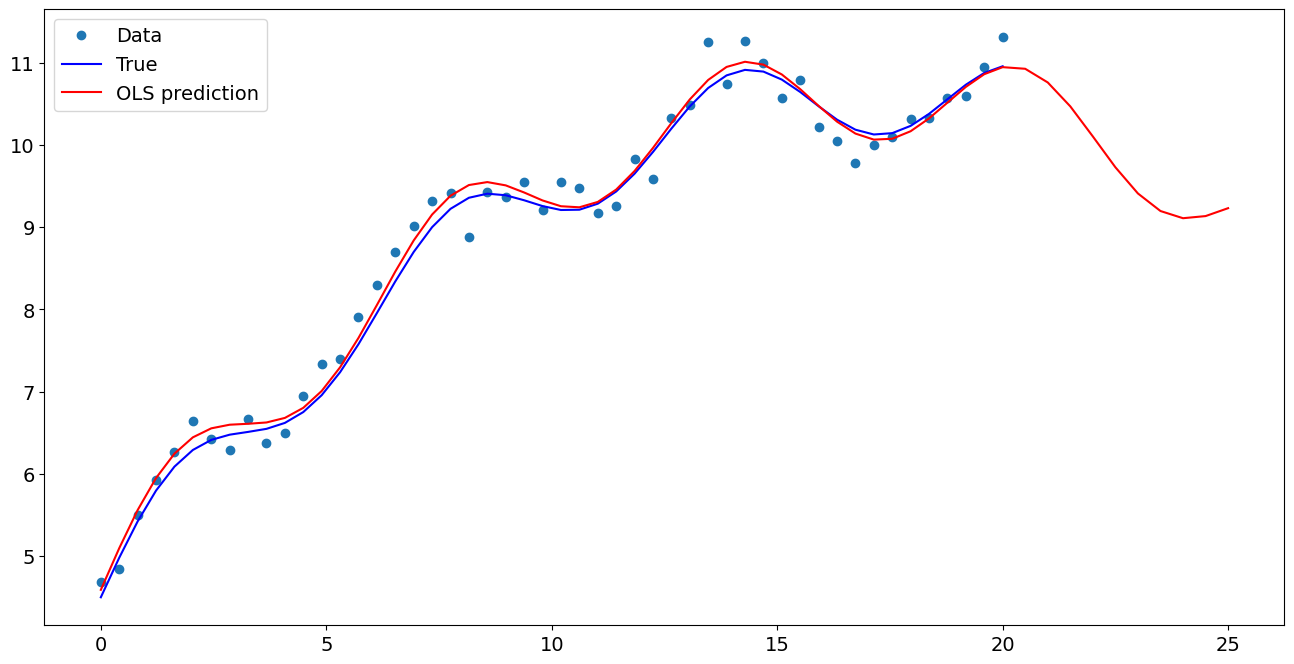

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.109066
x1                  0.499753
np.sin(x1)          0.557838
I((x1 - 5) ** 2)   -0.020745
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.926133
1    10.759927
2    10.469080
3    10.103445
4     9.728646
5     9.410012
6     9.196581
7     9.109094
8     9.134917
9     9.231134
dtype: float64